In [1]:
%run ~/relmapping/annot/notebooks/__init__.ipynb

/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


os.getcwd(): /mnt/b2/scratch/ahringer/jj374/lab/relmapping


In [2]:
# Read states
fp_ee_auto = 'wget/www.pnas.org/content/suppl/2016/10/25/1608162113.DCSupplemental/EE_autosome_states.csv'
fp_ee_chrx = 'wget/www.pnas.org/content/suppl/2016/10/25/1608162113.DCSupplemental/EE_chrX_states.csv'
fp_l3_auto = 'wget/www.pnas.org/content/suppl/2016/10/25/1608162113.DCSupplemental/L3_autosome_states.csv'
fp_l3_chrx = 'wget/www.pnas.org/content/suppl/2016/10/25/1608162113.DCSupplemental/L3_chrX_states.csv'

df_ee_auto = pd.read_csv(fp_ee_auto, names=['chrom', 'start', 'end', 'state_id'])
df_ee_auto['chrom'] = df_ee_auto['chrom'].map(lambda chrom: 'chr' + chrom)

df_l3_auto = pd.read_csv(fp_l3_auto, names=['chrom', 'start', 'end', 'state_id'])
df_l3_auto['chrom'] = df_l3_auto['chrom'].map(lambda chrom: 'chr' + chrom)

print(len(df_ee_auto), 'EE autosomal states')
print(len(df_l3_auto), 'L3 autosomal states')

ee_statekey = collections.OrderedDict([
    (1, "Promoter I"),
    (2, "5' proximal and gene body"),
    (3, "Txn elongation I: exon, 3'"),
    (4, "Txn elongation II: exon and intron"),
    (5, "Txn elongation III: exon and gene end"),
    (6, "Txn elongation IV: low expression and repeats"),
    (7, "Txn elongation V: introns and repeats"),
    (8, "wk Promoter, enhancer, miRNAs"),
    (9, "Enhancer II: intergenic"),
    (10, "Enhancer III: weak"),
    (11, "Border"),
    (12, "Repeats, intergenic, low expr introns"),
    (13, "Retrotransposons, pseudogenes, H3K9me3, H3K27me3"),
    (14, "Mixed, tissue specific"),
    (15, "Repeats, RNA pseudogenes, H3K9me2"),
    (16, "Intergenic, silent genes, piRNAs"),
    (17, "Pc/H3K27me3 I: low expr/silent and pseudogenes"),
    (18, "Pc/H3K27me3 II: low expr/silent, intergenic and gene body"),
    (19, "Pc/H3K27me3 III: low expr/silent, gene body"),
    (20, "H3K9me3 and H3K27me3: silent genes and pseudogenes"),
])

l3_statekey = collections.OrderedDict([
    (1, "Promoter"),
    (2, "5' proximal and gene body"),
    (3, "Txn elongation I: exon"),
    (4, "Txn elongation II: exon and intron"),
    (5, "Txn elongation III: exon and gene end"),
    (6, "Txn elongation IV: low expression and repeats"),
    (7, "Txn elongation V: introns and repeats"),
    (8, "Enhancer I: intronic"),
    (9, "Enhancer II: intergenic"),
    (10, "Enhancer III: weak"),
    (11, "Border"),
    (12, "Repeats, low expr introns, AT rich"),
    (13, "Retrotransposons, pseudogenes, H3K9me3, H3K27me3"),
    (14, "Mixed, tissue specific"),
    (15, "Repeats, RNA pseudogenes, H3K9me2"),
    (16, "Intergenic, silent genes, piRNAs amd repeats"),
    (17, "Pc/H3K27me3 I: low expr/silent and pseudogenes"),
    (18, "Pc/H3K27me3 II: low expr/silent"),
    (19, "Pc/H3K27me3 III: low expr/silent, gene body"),
    (20, "H3K9me3 and H3K27me3: silent genes and pseudogenes"),
])

colourkey = collections.OrderedDict([
    (1, '255,0,0'),
    (2, '234,155,86'),
    (3, '55,126,34'),
    (4, '124,146,72'),
    (5, '200,214,161'),
    (6, '117,251,142'),
    (7, '213,254,125'),
    (8, '234,51,127'),
    (9, '237,120,203'),
    (10, '244,185,195'),
    (11, '117,20,245'),
    (12, '0,0,245'),
    (13, '97,140,207'),
    (14, '120,67,21'),
    (15, '188,203,226'),
    (16, '128,128,128'),
    (17, '219,217,198'),
    (18, '195,189,155'),
    (19, '146,138,91'),
    (20, '13,13,13'),
])

df_ee_auto['state'] = df_ee_auto['state_id'].map(lambda state_id: ee_statekey[state_id])
df_l3_auto['state'] = df_l3_auto['state_id'].map(lambda state_id: l3_statekey[state_id])

df_ee_auto['colour'] = df_ee_auto['state_id'].map(lambda state_id: colourkey[state_id])
df_l3_auto['colour'] = df_l3_auto['state_id'].map(lambda state_id: colourkey[state_id])

82370 EE autosomal states
153164 L3 autosomal states


In [4]:
df_ee_auto.to_csv('annot/FigB_chromatin_states/Evans2016_EE.tsv', sep='\t', index=False)
df_l3_auto.to_csv('annot/FigB_chromatin_states/Evans2016_L3.tsv', sep='\t', index=False)

write_gffbed('annot/FigB_chromatin_states/Evans2016_EE.bed',
    chrom = df_ee_auto['chrom'],
    start = df_ee_auto['start'],
    end = df_ee_auto['end'],
    name = df_ee_auto['state'],
    attr = df_ee_auto[['state_id', 'state', 'colour']],
    itemRgb = df_ee_auto['colour'],
)

write_gffbed('annot/FigB_chromatin_states/Evans2016_L3.bed',
    chrom = df_l3_auto['chrom'],
    start = df_l3_auto['start'],
    end = df_l3_auto['end'],
    name = df_l3_auto['state'],
    attr = df_l3_auto[['state_id', 'state', 'colour']],
    itemRgb = df_l3_auto['colour'],
)

In [4]:
# Assign autosomal peaks to states
df_regl = regl_addons().query("chrom != 'chrX'")
df_mode = regl_mode().query("chrom != 'chrX'")

df_regl['state_ee'] = BedTool.from_dataframe(df_mode).map(
    b=BedTool.from_dataframe(df_ee_auto[['chrom', 'start', 'end', 'state']]),
    c=4, o='distinct',
).to_dataframe()['name']

df_regl['state_l3'] = BedTool.from_dataframe(df_mode).map(
    b=BedTool.from_dataframe(df_l3_auto[['chrom', 'start', 'end', 'state']]),
    c=4, o='distinct',
).to_dataframe()['name']

7076 non-promoters outside of outron/gene body (=no gene_id)


/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice


13195 of 42245 sites with CV values via promoter annotation
32525 of 42245 sites with CV values via "associated gene"


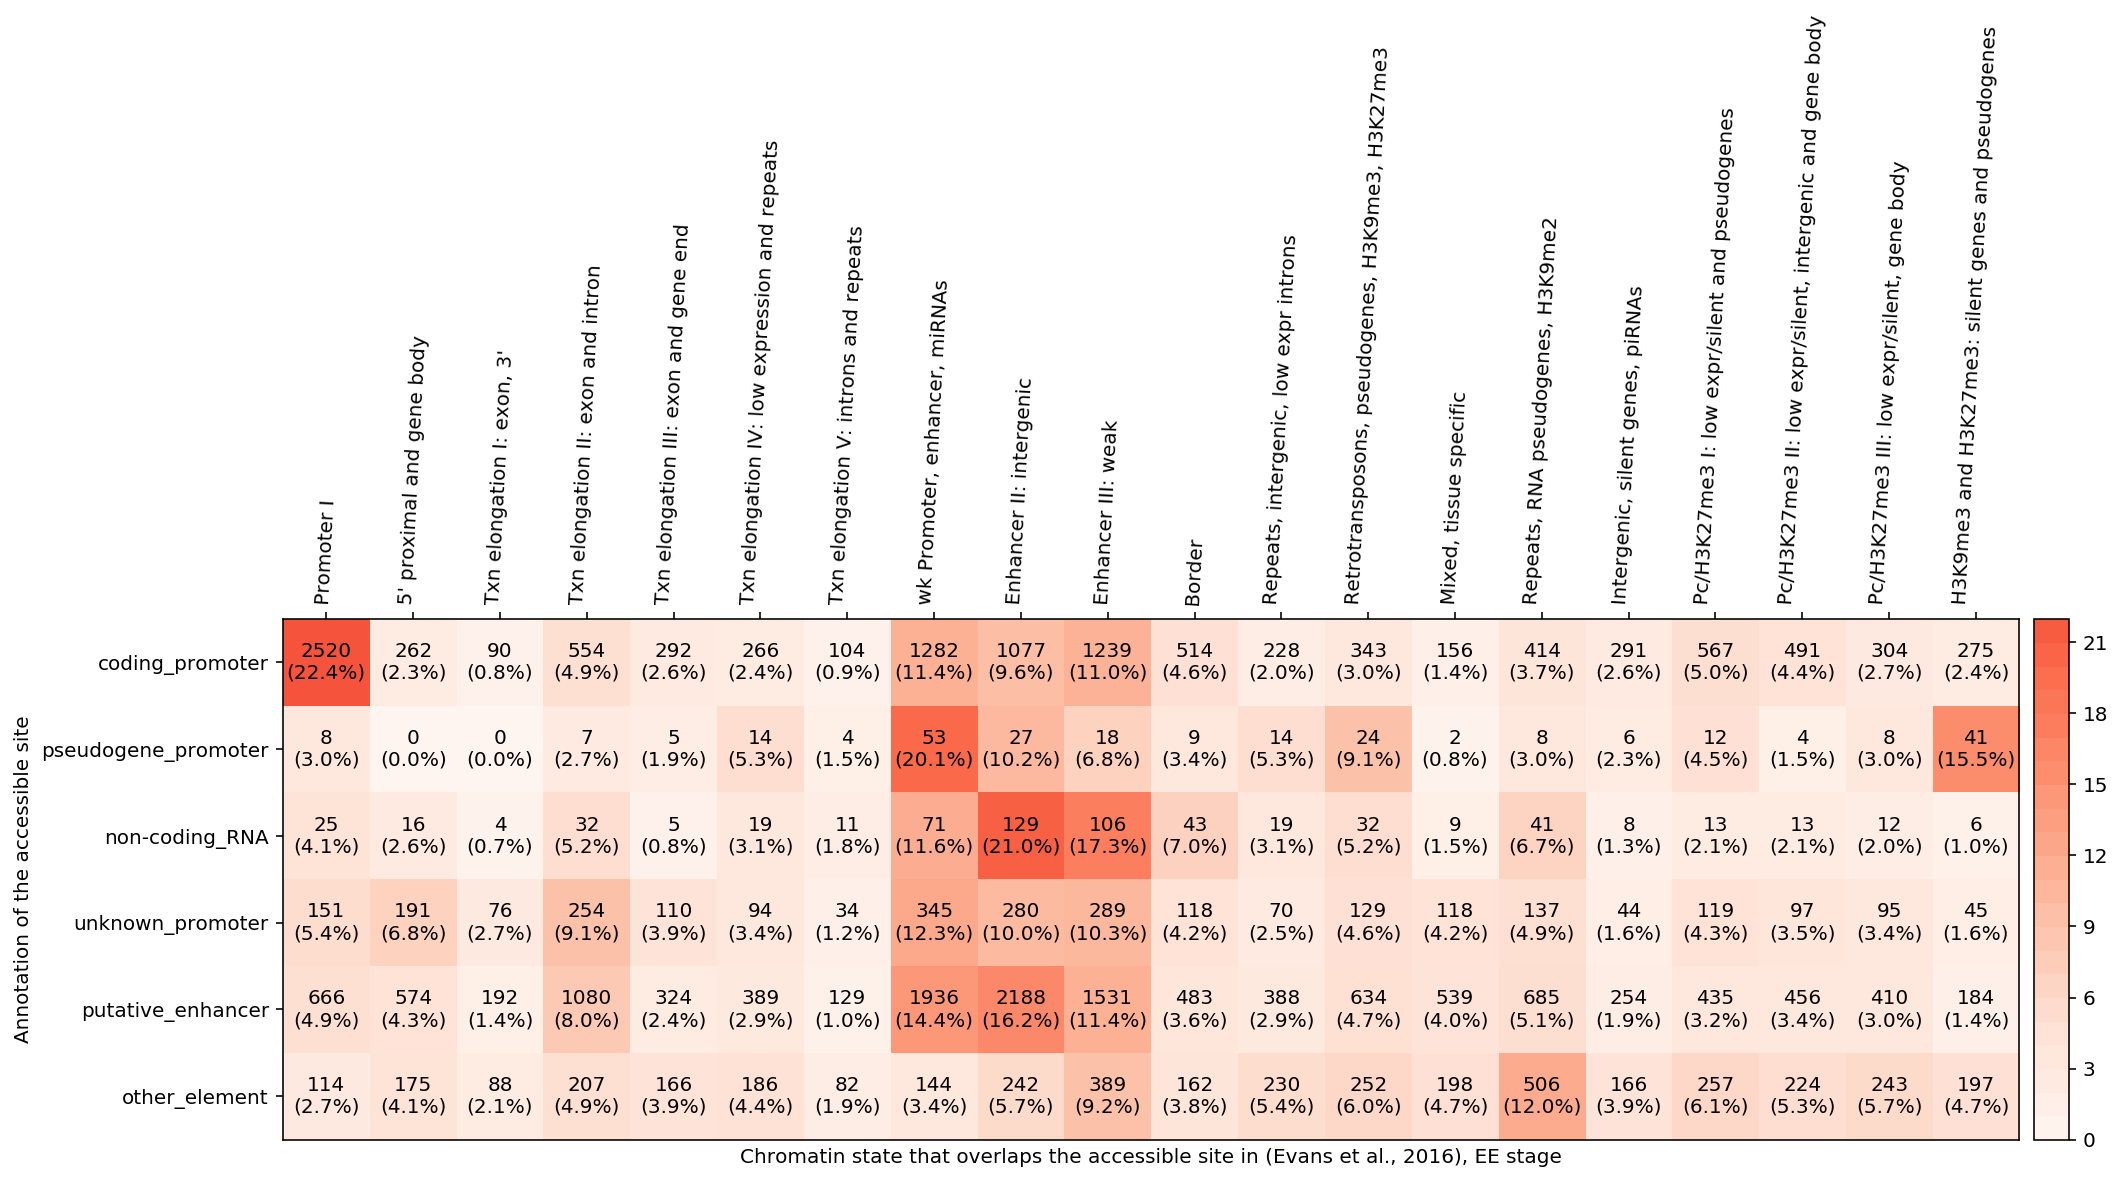

In [5]:
ct_ = pd.crosstab(
    pd.Categorical(df_regl['annot']), 
    pd.Categorical(df_regl['state_ee'])
).loc[config['annot'], list(ee_statekey.values())]
fig = plt.figure(figsize=(16, 5))
plt.gca().set_xlabel('Chromatin state that overlaps the accessible site in (Evans et al., 2016), EE stage')
plt.gca().set_ylabel('Annotation of the accessible site')
yp.imshow_rpc(ct_, cmap='Reds', vmin=0, vmax=+40, rotation=87, boundaries=np.linspace(0, 22, 23, endpoint=True))
plt.savefig('annot/FigB_chromatin_states/annot_vs_Evans2016_EE.png', bbox_inches='tight')

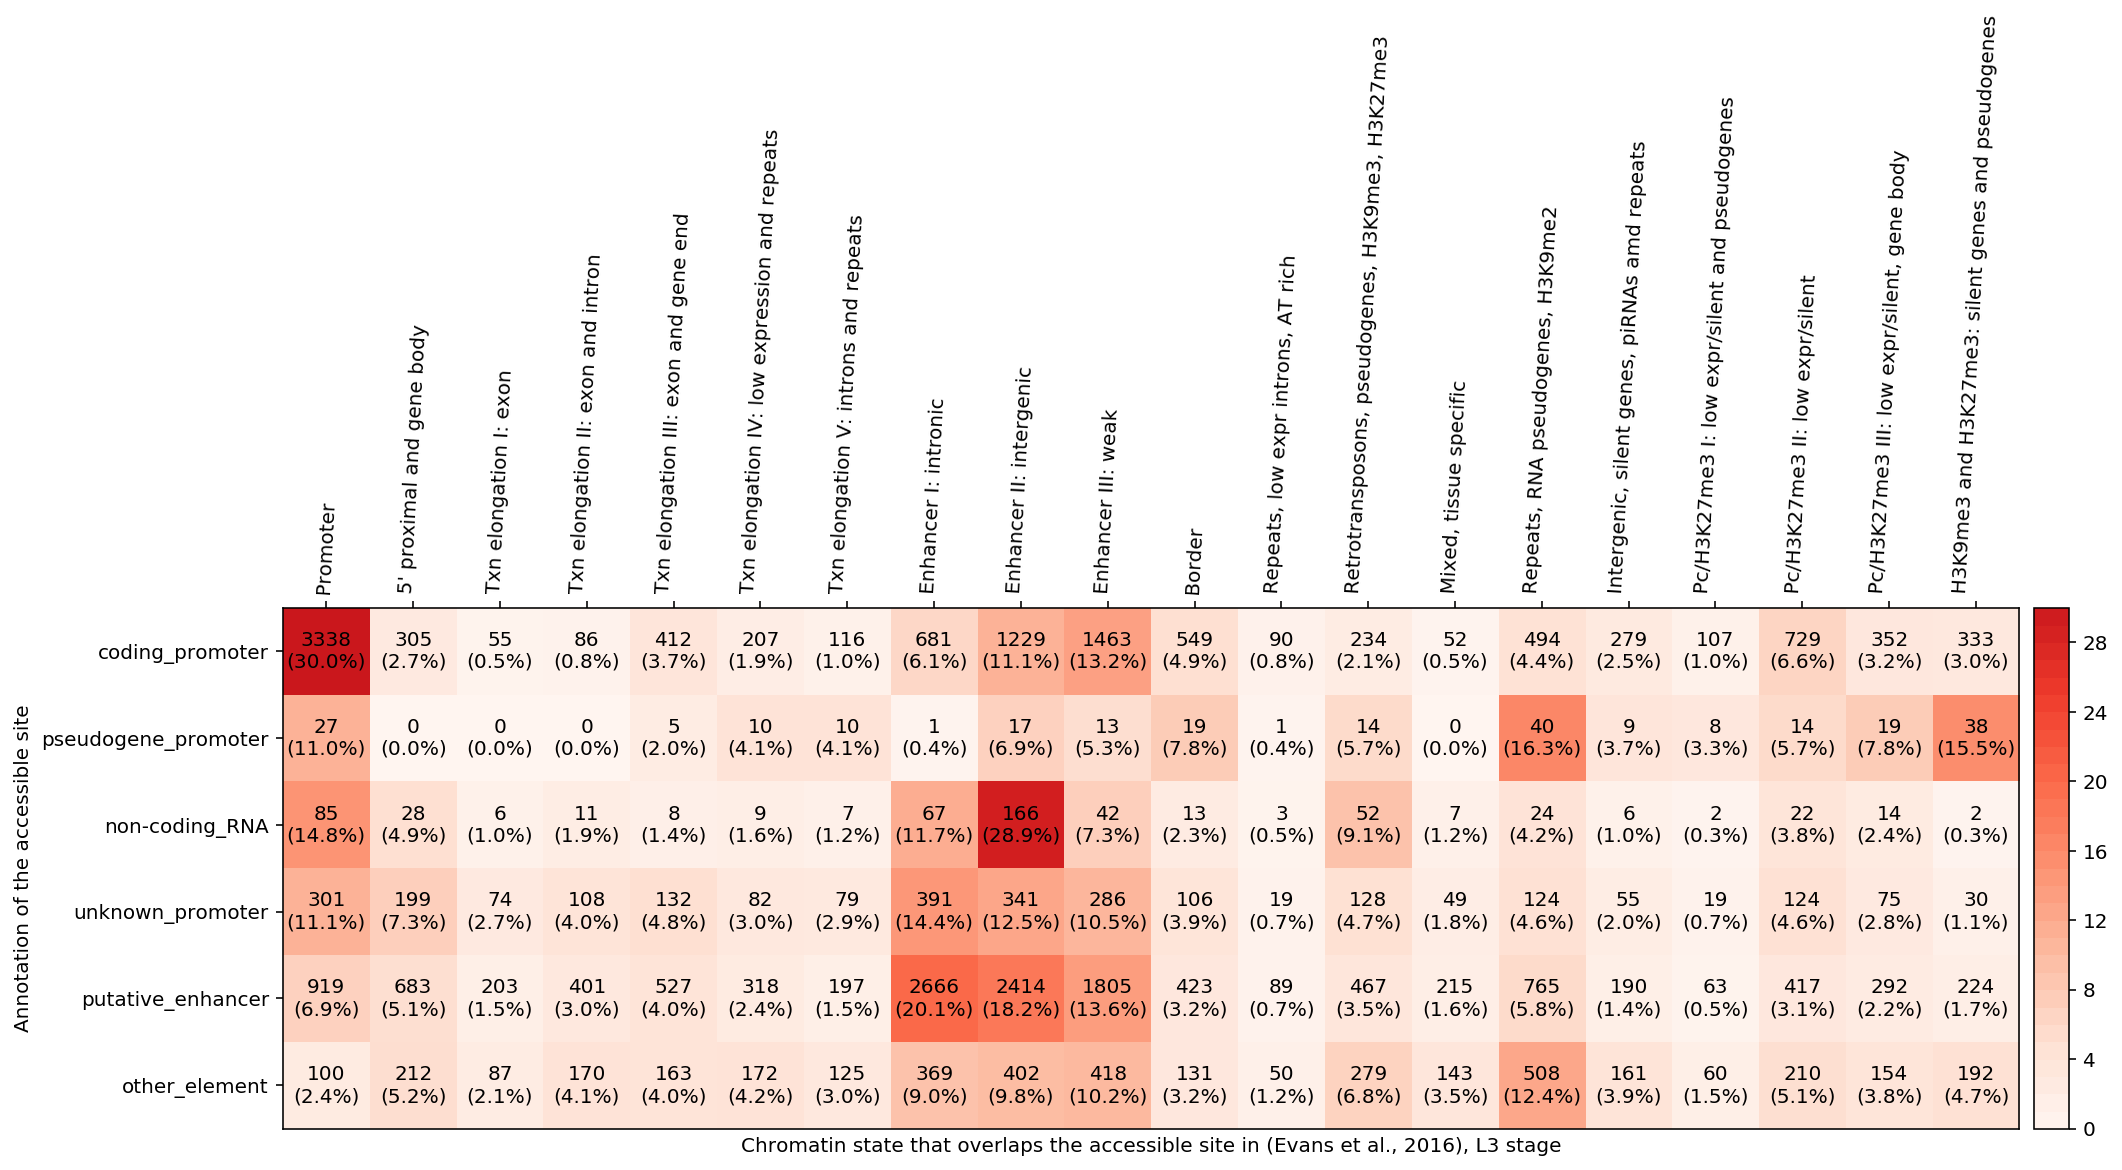

In [6]:
ct_ = pd.crosstab(
    pd.Categorical(df_regl['annot']), 
    pd.Categorical(df_regl['state_l3'])
).loc[config['annot'], list(l3_statekey.values())]
fig = plt.figure(figsize=(16, 5))
plt.gca().set_xlabel('Chromatin state that overlaps the accessible site in (Evans et al., 2016), L3 stage')
plt.gca().set_ylabel('Annotation of the accessible site')
yp.imshow_rpc(ct_, cmap='Reds', vmin=0, vmax=+40, rotation=87, boundaries=np.linspace(0, 30, 31, endpoint=True))
plt.savefig('annot/FigB_chromatin_states/annot_vs_Evans2016_L3.png', bbox_inches='tight')